In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', context='talk')
import re

In [3]:
%load_ext autoreload
%autoreload 2
import preprocessing as pr

In [4]:
df21=pd.read_excel('data2.xlsx', sheet_name='2021',index_col=0)

In [5]:
df20=pd.read_excel('data2.xlsx', sheet_name='2020',index_col=0)

In [6]:
df17=pd.read_excel('data2.xlsx', sheet_name='2017',index_col=0)

In [34]:
df=pd.concat([df21,df20,df17], ignore_index=True)

In [8]:
df.shape

(5314, 34)

In [35]:
df=pr.preprocess(df)

In [28]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
Average_laoding_greater_than_max_flag,5314,1.000000
Issuance_Date,4844,0.911554
FDF_ID.,1864,0.350772
Date_of_Transformer_Approved,1444,0.271735
Fault_Location,329,0.061912
Date_of_Transformer_Receipt,64,0.012044
Max._oil_level_(Ltr.),0,0.000000
Oil_Quantity,0,0.000000
Oil_%,0,0.000000
TTR_Status,0,0.000000


Text(0.5, 1.0, 'Transformers faults categorized from 2017-2021')

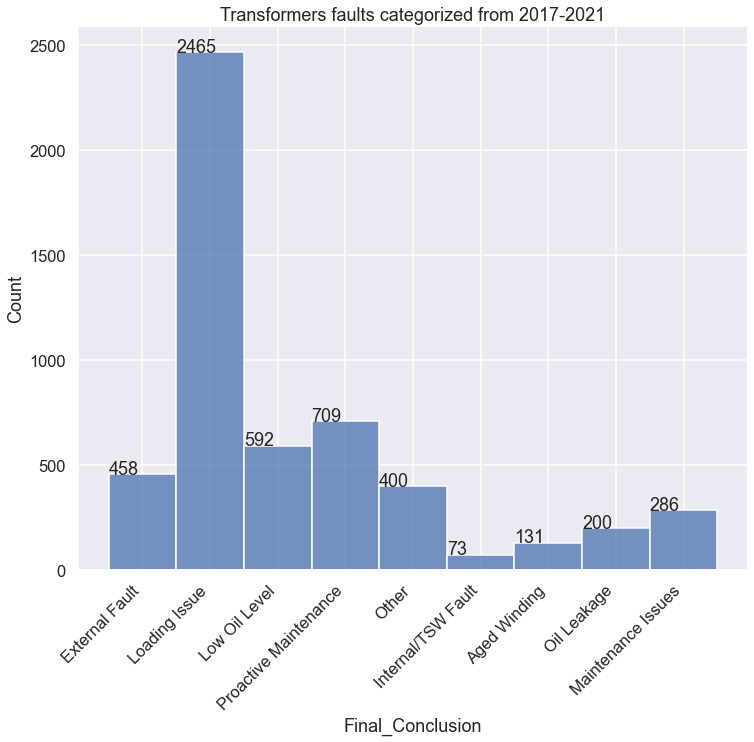

In [31]:
plt.figure(figsize=(12, 10))
ax=sns.histplot(df.Final_Conclusion,)
plt.xticks(rotation=45,ha='right')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1))
plt.title('Transformers faults categorized from 2017-2021')

<AxesSubplot:>

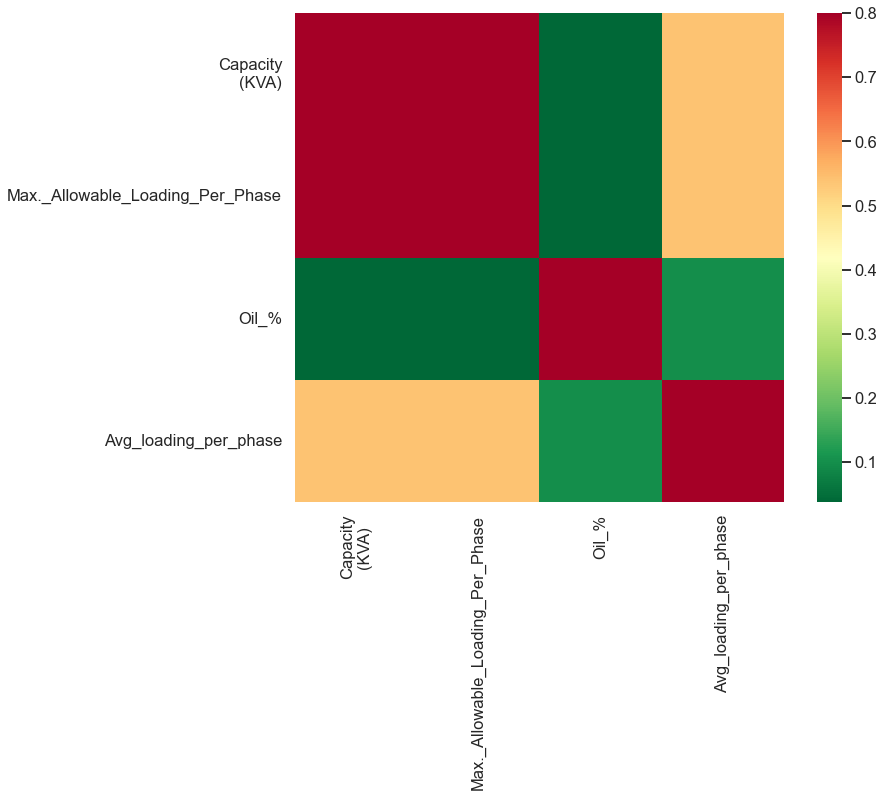

In [32]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")


In [92]:
df.head()

,Capacity\n(KVA),Make,Faulty_Transformer_Date,REGION,CLUSTER,Max._Allowable_Loading_Per_Phase,Transformer_Repaired_By_TSW,REMARKS,Transformer_being_removed_on,Oil_%,TTR_Status,Tap_changer_status,Oil_status,Silica_Gel_Status,Conservator_Tank_Valve,Top_Status,Work_Details_Carried_Out,Observations,Avg_loading_per_phase
0,50,SIEMENS,12,R4,CN,69.444444,NO,MISSING/UNINTELLIGIBLE,MISSING/UNINTELLIGIBLE,0.640000,OK,A,C,Not Available,Not Available,C,Minor Repair,Low oil level,204.719945
1,100,P/POWER,08,R3,CJ,138.888889,YES,LINK BLOWN OUT,FAULT,0.852381,"R,FAULTY",A,C,Not Available,Not Available,B,"RYB, HT & LT CHANGED",FDF NA (Fault cannot be determined),131.000000
2,250,J&P,12,R2,CS,347.222222,NO,OIL LEAKAGE,PROACTIVE MAINTENANCE,0.602353,"3,FAULTY",A,C,D,A,B,"RYB, HT & LT CHANGED",FDF NA (Fault cannot be determined),270.666667
3,250,CLIMAX,10,R2,CS,347.222222,NO,OIL LEAKAGE,PROACTIVE MAINTENANCE,0.602353,"3,FAULTY",A,C,D,A,B,"RYB, HT & LT CHANGED",FDF NA (Fault cannot be determined),117.666667
4,500,CLIMAX,12,R1,CO,694.444444,NO,OIL LEAKAGE,FAULT,0.347222,OK,A,C,D,A,B,"RYB, HT & LT CHANGED",FDF NA (Fault cannot be determined),171.105263


In [36]:
################################################

X_train, X_test, y_train, y_test = pr.get_train_test(df)

In [39]:
from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import train_test_split

In [40]:
num_feats = pr.get_num_feats(df)

In [41]:
cat_feats=pr.get_cat_feats(df)

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [44]:
numeric_transform = Pipeline([('scaling', StandardScaler()),])

categorical_transform = Pipeline([('one-hot-encode', OneHotEncoder(sparse=False))])

preprocessing_df = ColumnTransformer([('numeric', numeric_transform, num_feats), 
                                    ('categorical', categorical_transform, cat_feats)])

In [45]:
pipeline = Pipeline([('preprocessing', preprocessing_df),
                     #('pca', PCA(n_components=10)),
                     ('model',RandomForestClassifier(max_depth=6, random_state=0))])

In [46]:

###########Random forest####################3
param_grid = {#'model__kernel': ['linear','poly','rbf'],
              'model__max_depth':[6,10,13]}
              #'preprocessing__numeric__pca__n_components': [3, 5, 7],
              #'preprocessing__categorical__select_best__k': [3,5,7]}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

#best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.748824082784572
Achieved with hyperparameters: {'model__max_depth': 13}


In [49]:
###########################Majority Class Pred########
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
acc=dummy_clf.score(X_test, y_test)
acc

0.47130761994355597

In [ ]:
from sklearn.model_selection import GridSearchCV


In [50]:
##############XGBoost#######

import xgboost as xgb
model = xgb.XGBClassifier()

In [51]:
pipeline = Pipeline([('preprocessing', preprocessing_df),
                     #('pca', PCA(n_components=10)),
                     ('model',model)])

In [56]:

param_grid = {'model__max_depth': [10, 12, 15],
              'model__n_estimators': [50, 100]}


grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)



[23:45:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:45:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[23:52:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:53:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['Capacity\n'
                                                                          '(KVA)',
                                                                          'Max._Allowable_Loading_Per_Phase',
                                                                          'Oil_%',
                                                                          'Avg_loading_per_phase']),
                                                                        ('categorical',
                                                                         Pip

In [58]:
#best_model = grid.best_estimator_
best_acc = grid.score(X_test, y_test)
best_hyperparams = grid.best_params_
mean_score = grid.cv_results_["mean_test_score"][grid.best_index_]
print(f"Mean CV score: {mean_score: .6f}")
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Mean CV score:  0.761705
Best test set accuracy: 0.7666980244590781
Achieved with hyperparameters: {'model__max_depth': 12, 'model__n_estimators': 100}


In [60]:
######SVC#####

from sklearn.svm import SVC
svm_model=SVC()

In [61]:
pipeline_svm = Pipeline([('preprocessing', preprocessing_df),
                     #('pca', PCA(n_components=10)),
                     ('model',svm_model)])

In [62]:

pipeline_svm.fit(X_train, y_train)



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Capacity\n(KVA)',
                                                   'Max._Allowable_Loading_Per_Phase',
                                                   'Oil_%',
                                                   'Avg_loading_per_phase']),
                                                 ('categorical',
                                                  Pipeline(steps=[('one-hot-encode',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Make',
                                                   'Faulty_Transformer_Date',
                                                   'REGION

In [66]:
#best_model = grid.best_estimator_
best_acc = pipeline_svm.score(X_test, y_test)
#best_hyperparams = grid_svm.best_params_
print(f'Best test set accuracy: {best_acc}')

Best test set accuracy: 0.7525870178739417


In [68]:
###############3kNN################

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [69]:
pipeline = Pipeline([('preprocessing', preprocessing_df),
                     #('pca', PCA(n_components=10)),
                     ('model',knn)])

In [71]:

param_grid = {'model__n_neighbors': [5,10,20],
              }


grid_knn = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_knn.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['Capacity\n'
                                                                          '(KVA)',
                                                                          'Max._Allowable_Loading_Per_Phase',
                                                                          'Oil_%',
                                                                          'Avg_loading_per_phase']),
                                                                        ('categorical',
                                                                         Pip

In [72]:
#best_model = grid.best_estimator_
best_acc = grid_knn.score(X_test, y_test)
best_hyperparams = grid_knn.best_params_
#mean_score = grid.cv_results_["mean_test_score"][grid.best_index_]
#print(f"Mean CV score: {mean_score: .6f}")
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.6698024459078081
Achieved with hyperparameters: {'model__n_neighbors': 10}


In [74]:
###############3kNN################

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [75]:
pipeline = Pipeline([('preprocessing', preprocessing_df),
                     #('pca', PCA(n_components=10)),
                     ('model',LR)])

In [76]:

param_grid = {'model__C': [1,10,100],
              }


grid_LR = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_LR.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['Capacity\n'
                                                                          '(KVA)',
                                                                          'Max._Allowable_Loading_Per_Phase',
                                                                          'Oil_%',
                                                                          'Avg_loading_per_phase']),
                                                                        ('categorical',
                                                                         Pip

In [77]:
#best_model = grid.best_estimator_
best_acc = grid_LR.score(X_test, y_test)
best_hyperparams = grid_LR.best_params_
#mean_score = grid.cv_results_["mean_test_score"][grid.best_index_]
#print(f"Mean CV score: {mean_score: .6f}")
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.7309501411100658
Achieved with hyperparameters: {'model__C': 1}


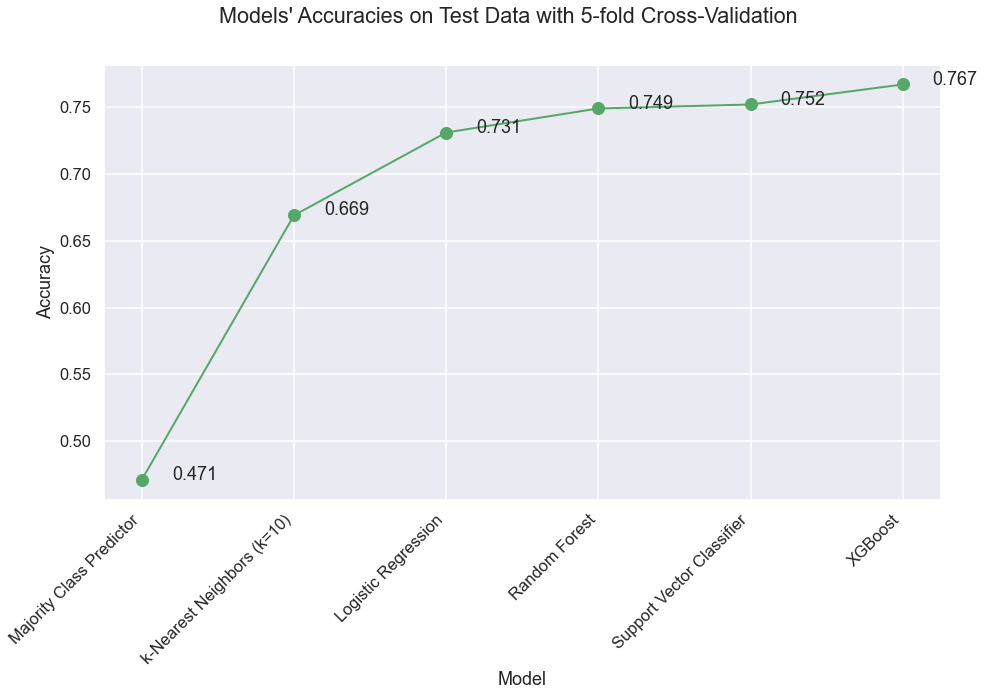

In [91]:
results=[0.471,0.669,0.731,0.749,0.752,0.767]
names=['Majority Class Predictor', 'k-Nearest Neighbors (k=10)','Logistic Regression','Random Forest',\
       'Support Vector Classifier','XGBoost']


fig = plt.figure(figsize=(15,8))
fig.suptitle("Models' Accuracies on Test Data with 5-fold Cross-Validation")
ax = fig.add_subplot(111)
plt.plot(names,results,'go-', linewidth=2, markersize=12)
#ax.set_xticklabels(names)

plt.xticks(rotation=45,ha='right')
for i,j in zip(names,results):
    ax.annotate('%s' %j, xy=(i,j), xytext=(30,0), textcoords='offset points')
    #ax.annotate('(%s,' %i, xy=(i,j))
#plt.title('Transformers faults categorized from 2017-2021')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


In [100]:
#########################

import pickle

In [101]:
pickle.dump(svm_model_linear, open( "model.p", "wb" ) )

In [104]:
df[:1].to_json()

'{"Make_CLIMAX":{"0":0},"Make_ELMETEC":{"0":0},"Make_J&P":{"0":0},"Make_MML":{"0":0},"Make_P\\/POWER":{"0":0},"Make_PEL":{"0":0},"Make_SAMCO":{"0":0},"Make_SIEMENS":{"0":1},"Make_T\\/FAB":{"0":0},"Make_T\\/PAK":{"0":0},"Make_T\\/POWER":{"0":0},"Make_VALIDUS":{"0":0},"Make_missing":{"0":0},"Faulty_Transformer_Date_01":{"0":0},"Faulty_Transformer_Date_02":{"0":0},"Faulty_Transformer_Date_03":{"0":0},"Faulty_Transformer_Date_04":{"0":0},"Faulty_Transformer_Date_05":{"0":0},"Faulty_Transformer_Date_06":{"0":0},"Faulty_Transformer_Date_07":{"0":0},"Faulty_Transformer_Date_08":{"0":0},"Faulty_Transformer_Date_09":{"0":0},"Faulty_Transformer_Date_10":{"0":0},"Faulty_Transformer_Date_11":{"0":0},"Faulty_Transformer_Date_12":{"0":1},"Faulty_Transformer_Date_missing":{"0":0},"REGION_R1":{"0":0},"REGION_R2":{"0":0},"REGION_R3":{"0":0},"REGION_R4":{"0":1},"CLUSTER_CB":{"0":0},"CLUSTER_CD":{"0":0},"CLUSTER_CG":{"0":0},"CLUSTER_CJ":{"0":0},"CLUSTER_CK":{"0":0},"CLUSTER_CN":{"0":1},"CLUSTER_CO":{"0":

In [123]:
json_data = {"Make_CLIMAX":{"0":0},"Make_ELMETEC":{"0":0},"Make_J&P":{"0":0},"Make_MML":{"0":0},"Make_P/POWER":{"0":0},"Make_PEL":{"0":0},"Make_SAMCO":{"0":0},"Make_SIEMENS":{"0":1},"Make_T/FAB":{"0":0},"Make_T/PAK":{"0":0},"Make_T/POWER":{"0":0},"Make_VALIDUS":{"0":0},"Make_missing":{"0":0},"Faulty_Transformer_Date_01":{"0":0},"Faulty_Transformer_Date_02":{"0":0},"Faulty_Transformer_Date_03":{"0":0},"Faulty_Transformer_Date_04":{"0":0},"Faulty_Transformer_Date_05":{"0":0},"Faulty_Transformer_Date_06":{"0":0},"Faulty_Transformer_Date_07":{"0":0},"Faulty_Transformer_Date_08":{"0":0},"Faulty_Transformer_Date_09":{"0":0},"Faulty_Transformer_Date_10":{"0":0},"Faulty_Transformer_Date_11":{"0":0},"Faulty_Transformer_Date_12":{"0":1},"Faulty_Transformer_Date_missing":{"0":0},"REGION_R1":{"0":0},"REGION_R2":{"0":0},"REGION_R3":{"0":0},"REGION_R4":{"0":1},"CLUSTER_CB":{"0":0},"CLUSTER_CD":{"0":0},"CLUSTER_CG":{"0":0},"CLUSTER_CJ":{"0":0},"CLUSTER_CK":{"0":0},"CLUSTER_CN":{"0":1},"CLUSTER_CO":{"0":0},"CLUSTER_CQ":{"0":0},"CLUSTER_CS":{"0":0},"CLUSTER_CU":{"0":0},"Transformer_Repaired_By_TSW_NO":{"0":1},"Transformer_Repaired_By_TSW_SCRAPPED":{"0":0},"Transformer_Repaired_By_TSW_YES":{"0":0},"TTR_Status_3,FAULTY":{"0":0},"TTR_Status_3,OPEN":{"0":0},"TTR_Status_B,FAULTY":{"0":0},"TTR_Status_B,OPEN":{"0":0},"TTR_Status_OK":{"0":1},"TTR_Status_R,B,FAULTY":{"0":0},"TTR_Status_R,B,OPEN":{"0":0},"TTR_Status_R,FAULTY":{"0":0},"TTR_Status_R,OPEN":{"0":0},"TTR_Status_R,Y,FAULTY":{"0":0},"TTR_Status_R,Y,OPEN":{"0":0},"TTR_Status_Y,B,FAULTY":{"0":0},"TTR_Status_Y,B,OPEN":{"0":0},"TTR_Status_Y,FAULTY":{"0":0},"TTR_Status_Y,OPEN":{"0":0},"TTR_Status_nan":{"0":0},"Work_Details_Carried_Out_BLUE PHASE HT & LT CHANGED":{"0":0},"Work_Details_Carried_Out_CANABLIZED":{"0":0},"Work_Details_Carried_Out_Minor Repair":{"0":1},"Work_Details_Carried_Out_Partial Winding changed":{"0":0},"Work_Details_Carried_Out_RED PHASE HT & LT CHANGED":{"0":0},"Work_Details_Carried_Out_RYB, HT & LT CHANGED":{"0":0},"Work_Details_Carried_Out_YELLOW PHASE HT & LT CHANGED":{"0":0},"Work_Details_Carried_Out_nan":{"0":0},"Observations_Aged winding":{"0":0},"Observations_Cooling pipe damaged":{"0":0},"Observations_FDF NA (Fault cannot be determined)":{"0":0},"Observations_Low oil level":{"0":1},"Observations_Low oil level, Aged insulation":{"0":0},"Observations_Low oil level, Flashes on bushing":{"0":0},"Observations_Low oil level, Overloading":{"0":0},"Observations_Overloading":{"0":0},"Observations_Top poor":{"0":0},"Observations_Top poor, HT & LT bushings hopeless":{"0":0},"Observations_Top poor, HT & LT bushings hopeless, Low oil level":{"0":0},"Observations_Top poor, Low oil level":{"0":0},"Capacity\\n(KVA)":{"0":-1.1388403663},"Max._Allowable_Loading_Per_Phase":{"0":-1.1384252943},"RED_PHASE_LOADING":{"0":0.0592365278},"YELLOW_PHASE_LOADING":{"0":0.1021671184},"BLUE_PHASE_LOADING":{"0":0.0636705352},"Rated_Power":{"0":-1.1384252943},"Max._oil_level_(Ltr.)":{"0":-0.684388239},"Oil_Quantity":{"0":-0.985991608},"Oil_%":{"0":-0.0801064339}}

In [124]:
import requests
URL = "http://ec2-3-99-130-65.ca-central-1.compute.amazonaws.com:5000/scoring"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data) 

In [125]:
print(r.text)

[
    "Proactive Maintenance"
]



In [111]:
svm_model_linear.predict(df[:1])

array(['Proactive Maintenance'], dtype=object)

In [ ]:
#################################################
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[('scaling', StandardScaler()),
                           ('pca', PCA(n_components=3)),
                           ('classifier', SVC(kernel = 'linear', C = 1))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')

In [ ]:
fig = plt.figure(figsize=(10,10))
    fig.suptitle('How to compare sklearn classification algorithms')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()